In [1]:
import numpy as np
from numpy import*
import matplotlib.pyplot as plt

In [2]:
def plotBestFit(dataArr, labelMat, weights):
    '''
    Desc:            将我们得到的数据可视化展示出来
    Args:
        dataArr:样本数据的特征
        labelMat:样本数据的类别标签，即目标变量
        weights:回归系数
    Returns:            None
    '''
    n = shape(dataArr)[0]
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]) 
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]) 
            ycord2.append(dataArr[i,2])
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
            
    """
    y的由来，卧槽，是不是没看懂？    首先理论上是这个样子的。
    dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
    w0*x0+w1*x1+w2*x2=f(x)    x0最开始就设置为1叻， x2就是我们画图的y值，而f(x)被我们磨合误差给算到w0,w1,w2身上去了
    所以： w0+w1*x+w2*y=0 => y = (-w0-w1*x)/w2
    """
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X'); plt.ylabel('Y')
    plt.show()

In [3]:
# 解析数据
def loadDataSet(file_name):
    '''
    Desc: 
        加载并解析数据
    Args:
        file_name -- 文件名称，要解析的文件所在磁盘位置
    Returns:
        dataMat -- 原始数据的特征
        labelMat -- 原始数据的标签，也就是每条样本对应的类别
    '''
    # dataMat为原始数据， labelMat为原始数据的标签
    dataMat = []
    labelMat = []
    fr = open(file_name)
    for line in fr.readlines():
        lineArr = line.strip().split()
        if len(lineArr) == 1:
            continue    # 这里如果就一个空的元素，则跳过本次循环
        # 为了方便计算，我们将 X0 的值设为 1.0 ，也就是在每一行的开头添加一个 1.0 作为 X0
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

In [4]:
def sigmoid(x):
    # 这里其实非常有必要解释一下，会出现的错误 RuntimeWarning: overflow encountered in exp
    # 这个错误在学习阶段虽然可以忽略，但是我们至少应该知道为什么
    # 这里是因为我们输入的有的 x 实在是太小了，比如 -6000之类的，那么计算一个数字 np.exp(6000)这个结果太大了，没法表示，所以就溢出了
    # 如果是计算 np.exp（-6000），这样虽然也会溢出，但是这是下溢，就是表示成零
    # 去网上搜了很多方法，比如 使用bigfloat这个库（我竟然没有安装成功，就不尝试了，反正应该是有用的
    return 1.0 / (1 + np.exp(-x))

### 梯度上升

In [5]:
# 正常的处理方案
# 两个参数：第一个参数==> dataMatIn 是一个2维NumPy数组，每列分别代表每个不同的特征，每行则代表每个训练样本。
# 第二个参数==> classLabels 是类别标签，它是一个 1*100 的行向量。为了便于矩阵计算，需要将该行向量转换为列向量，做法是将原向量转置，再将它赋值给labelMat。
def gradAscent(dataMatIn, classLabels):
    # 转化为矩阵[[1,1,2],[1,1,2]....]
    dataMatrix = np.mat(dataMatIn)
    # 转换为 NumPy 矩阵
    # 转化为矩阵[[0,1,0,1,0,1.....]]，并转制[[0],[1],[0].....]
    # transpose() 行列转置函数
    # 将行向量转化为列向量   =>  矩阵的转置
    labelMat = np.mat(classLabels).transpose() # 首先将数组转换为 NumPy 矩阵，然后再将行向量转置为列向量
    # m->数据量，样本数 n->特征数
    m,n = shape(dataMatrix)
    # print m, n, '__'*10, shape(dataMatrix.transpose()), '__'*100
    # alpha代表向目标移动的步长
    alpha = 0.001
    # 迭代次数
    maxCycles = 500
    # 生成一个长度和特征数相同的矩阵，此处n为3 -> [[1],[1],[1]]
    # weights 代表回归系数， 此处的 ones((n,1)) 创建一个长度和特征数相同的矩阵，其中的数全部都是 1
    weights = ones((n,1))
    for k in range(maxCycles):
        # heavy on matrix operations
        # m*3 的矩阵 * 3*1 的单位矩阵 ＝ m*1的矩阵
        # 那么乘上单位矩阵的意义，就代表：通过公式得到的理论值
        # 参考地址： 矩阵乘法的本质是什么？ https://www.zhihu.com/question/21351965/answer/31050145
        # print 'dataMatrix====', dataMatrix
        # print 'weights====', weights
        # n*3   *  3*1  = n*1
        h = sigmoid(dataMatrix*weights)
        # 矩阵乘法
        # print 'hhhhhhh====', h
        # labelMat是实际值
        error = (labelMat - h)
        # 向量相减
        # 0.001* (3*n)*(n*1) 表示在每一个列上的一个误差情况，最后得出 x0,x1,x2的系数的偏移量
        weights = weights + alpha * dataMatrix.transpose() * error 
        # 矩阵乘法，最后得到回归系数
    return array(weights)


In [6]:
# 随机梯度上升
# 梯度上升优化算法在每次更新数据集时都需要遍历整个数据集，计算复杂都较高
# 随机梯度上升一次只用一个样本点来更新回归系数
def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    # n*1的矩阵
    # 函数ones创建一个全1的数组
    weights = ones(n)
    # 初始化长度为n的数组，元素全部为 1
    for i in range(m):
        # sum(dataMatrix[i]*weights)为了求 f(x)的值， f(x)=a1*x1+b2*x2+..+nn*xn,此处求出的 h 是一个具体的数值，而不是一个矩阵
        h = sigmoid(sum(dataMatrix[i]*weights))
        # print 'dataMatrix[i]===', dataMatrix[i]
        # 计算真实类别与预测类别之间的差值，然后按照该差值调整回归系数
        error = classLabels[i] - h
        # 0.01*(1*1)*(1*n)
        # print(weights, "*"*10 , dataMatrix[i], "*"*10 , error)
        weights = weights + alpha * error * dataMatrix[i]

    return weights


In [7]:
# 随机梯度上升算法（随机化）
def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)   # 创建与列数相同的矩阵的系数矩阵，所有的元素都是1
    # 随机梯度, 循环150,观察是否收敛
    for j in range(numIter):
        # [0, 1, 2 .. m-1]
        dataIndex = list(range(m))
        for i in range(m):
            # i和j的不断增大，导致alpha的值不断减少，但是不为0
            alpha = 4/(1.0+j+i)+0.0001
            # alpha 会随着迭代不断减小，但永远不会减小到0，因为后边还有一个常数项0.0001
            # 随机产生一个 0～len()之间的一个值
            # random.uniform(x, y) 方法将随机生成下一个实数，它在[x,y]范围内,x是这个范围内的最小值，y是这个范围内的最大值。
            randIndex = int(random.uniform(0,len(dataIndex)))
            # sum(dataMatrix[i]*weights)为了求 f(x)的值， f(x)=a1*x1+b2*x2+..+nn*xn
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            # print weights, '__h=%s' % h, '__'*20, alpha, '__'*20, error, '__'*20, dataMatrix[randIndex]
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])

    return weights


In [8]:
def testLR():
    # 1.收集并准备数据
    dataMat, labelMat = loadDataSet("5.Logistic/TestSet.txt")
    # print(dataMat, '\t---\t', labelMat)
    # [1.0, -0.017612, 14.053064]   0
    # 2.训练模型，  f(x)=a1*x1+b2*x2+..+nn*xn中 (a1,b2, .., nn).T的矩阵值
    # 因为数组没有是复制n份， array的乘法就是乘法
    dataArr = array(dataMat)
    # print dataArr
    weights = gradAscent(dataArr, labelMat)
    # weights = stocGradAscent0(dataArr, labelMat)
    # weights = stocGradAscent1(dataArr, labelMat)
    # print '*'*30, weights
    # 数据可视化
    plotBestFit(dataArr, labelMat, weights)
    

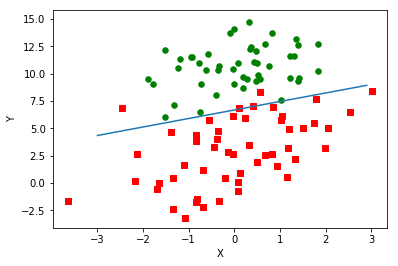

In [9]:
dataMat, labelMat = loadDataSet("5.Logistic/TestSet.txt")
dataArr = np.array(dataMat)
weights = gradAscent(dataArr, labelMat)
plotBestFit(dataArr, labelMat, weights)

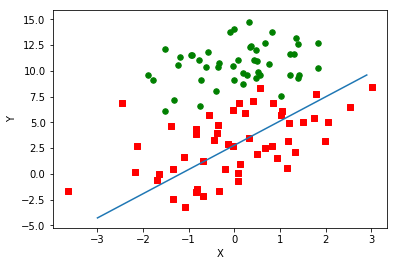

In [10]:
weights0 = stocGradAscent0(dataArr, labelMat)
plotBestFit(dataArr, labelMat, weights0)

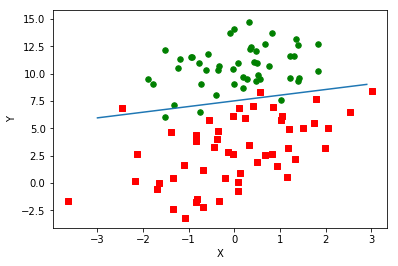

In [18]:
weights1 = stocGradAscent1(dataArr, labelMat)
plotBestFit(dataArr, labelMat, weights1)

In [17]:
ones((3,1))

array([[1.],
       [1.],
       [1.]])